In [1]:
import cococo.layouts as layouts
import cococo.utils_routing as utils
import cococo.circuit_construction as circuit_construction
import cococo.internal_testing as internal_testing
import plotting

## Example for Router with Movable Qubits

### Choose Layout

In [2]:
layout_type = "triple"
m = 4
n = 4
factories = []
remove_edges = False
g, data_qubit_locs, factory_ring = layouts.gen_layout_scalable(layout_type, m, n, factories, remove_edges)
layout = {i: j for i,j in enumerate(data_qubit_locs)}
t=2 #mock because we have only cnots here in the example

/mnt/c/Users/Laura/Documents/Codes_and_Repos/cococo/scripts/plotting.py:184: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


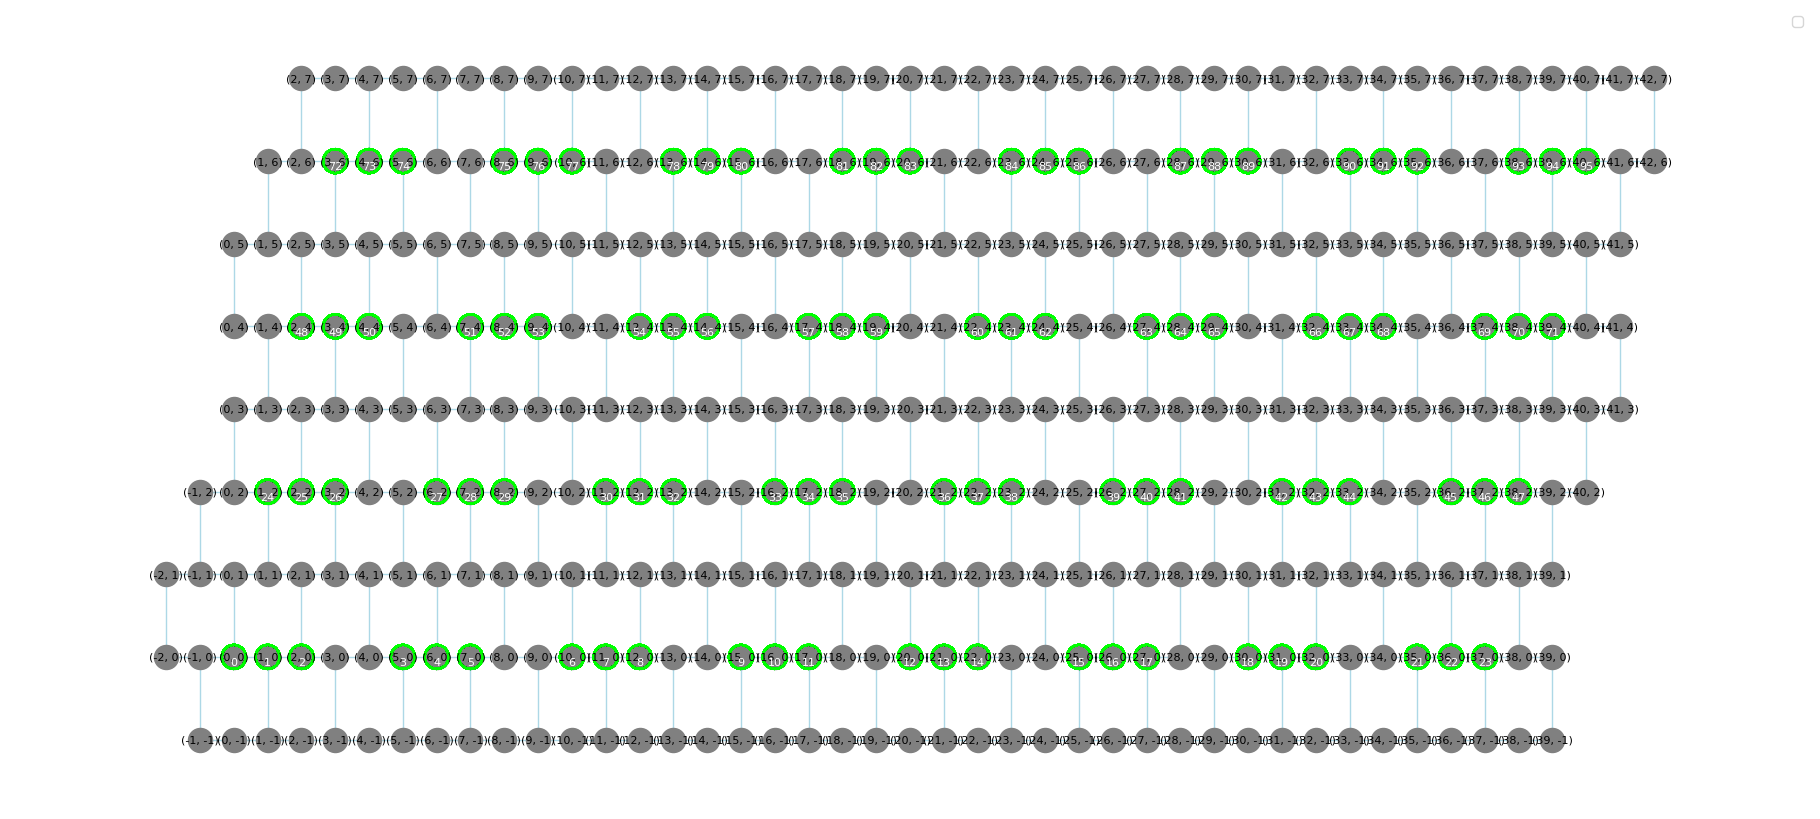

In [3]:
plotting.plot_lattice_paths(g, {}, {}, layout, factories, size = (18,8))

### Choose Circuit

In [4]:
q = len(data_qubit_locs)
j = 8
num_gates = q*2
dag, pairs = circuit_construction.create_random_sequential_circuit_dag(j, q, num_gates, )

### Run Standard Router with Standard Layout

In [5]:
terminal_pairs = layouts.translate_layout_circuit(pairs, layout) #let's stick to the simple layout

In [6]:
router = utils.BasicRouter(g, data_qubit_locs, factories, valid_path = "cc", t=t, metric = "exact", use_dag = True)
layers = router.split_layer_terminal_pairs(terminal_pairs)
vdp_layers, _ = router.find_total_vdp_layers_dyn(layers, data_qubit_locs, router.factory_times, layout, testing = True)
print("Len of schedule without teleportation: ", len(vdp_layers))

2025-11-15 14:00:51,742 [INFO] root: stim test succeeded for standard routing (:
2025-11-15 14:00:51,744 [INFO] root: no duplicates found in standard routing (:
2025-11-15 14:00:51,747 [INFO] root: paths do not occupy logical pos (:
2025-11-15 14:00:51,748 [INFO] root: Reset times make sense, all good(:
Len of schedule without teleportation:  51


### Run Movable Qubits Router with Standard Initial Layout

In [7]:
router = utils.TeleportationRouter(g, data_qubit_locs, factories, valid_path="cc", t=t, metric="exact", use_dag = True)
layers = router.split_layer_terminal_pairs(terminal_pairs)

max_iters = 100
T_start = 100.0
T_end = 0.1
alpha = 0.95
t=4 #mock value for cnot circuit
radius = 10
k_lookahead = 5
metric = "exact"

steiner_init_type = "full_random"
jump_harvesting = True
stimtest = True

reduce_steiner = True
idle_move_type = "later"

schedule, _ = router.optimize_layers(        
        terminal_pairs,
        layout,
        max_iters,
        T_start,
        T_end,
        alpha,
        radius = radius,
        k_lookahead = k_lookahead,
        steiner_init_type = steiner_init_type,
        jump_harvesting = jump_harvesting,
        reduce_steiner = reduce_steiner,
        idle_move_type = idle_move_type,
        reduce_init_steiner = False,
        stimtest = True)

2025-11-15 14:00:51,853 [INFO] root: Iteration 0: |vdp_dict|=6, pushing |terminal_pairs_remainder|=2, remaining |layers|=24
2025-11-15 14:01:23,189 [INFO] root: Steiner found for this layer.
2025-11-15 14:01:23,191 [INFO] root: Final Temperature T = 5.920529e-01
2025-11-15 14:01:41,537 [INFO] root: Complexity of Steiner could be reduced.
2025-11-15 14:01:41,823 [INFO] root: Iteration 1: |vdp_dict|=4, pushing |terminal_pairs_remainder|=2, remaining |layers|=20
2025-11-15 14:01:41,849 [INFO] root: No idling path back could be found for danger qubit (18, 3)
2025-11-15 14:02:11,645 [INFO] root: Steiner found for this layer.
2025-11-15 14:02:11,646 [INFO] root: Final Temperature T = 5.920529e-01
2025-11-15 14:02:12,483 [INFO] root: Complexity of Steiner could be reduced.
2025-11-15 14:02:12,823 [INFO] root: Iteration 2: |vdp_dict|=7, pushing |terminal_pairs_remainder|=0, remaining |layers|=16
2025-11-15 14:02:12,841 [INFO] root: No idling path back could be found for danger qubit (26, 3)
20

In [8]:
print("Len of schedule with teleport router: ", len(schedule))

Len of schedule with teleport router:  35


In [9]:
print("Reduction Delta: ", len(vdp_layers) - len(schedule))

Reduction Delta:  16
